In [1]:
### imports ###
import pygmt
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.image as mpimg 
from mpl_toolkits.basemap import Basemap

import pandas as pd

%matplotlib inline
%matplotlib widget

In [3]:
# Major tectonic blocks and faults are marked by black lines (after Styron et al. (2010) and Taylor and An Yin (2009))
# https://github.com/HimaTibetMap/HimaTibetMap/tree/master
# Styron, R., Taylor, M., and Okoronkwo, K., 2010, HimaTibetMap-1.0: new ‘web-2.0’ online database of active structures from the Indo-Asian collision, Eos, vol.91 no. 20.
# Taylor, Michael, and An Yin, 2009, "Active structures of the Himalayan-Tibetan orogen and their relationships to earthquake distribution, contemporary strain field, and Cenozoic volcanism." Geosphere vol. 5, no. 3, pp 199-214.

# Slab contours are from the slab model of Hayes et al. (2018).
# Hayes, G., 2018, Slab2 - A Comprehensive Subduction Zone Geometry Model: U.S. Geological Survey data release, https://doi.org/10.5066/F7PV6JNV. 

# Seismicity from the Harvard CMT cffatalogue (Dziewonski et al. (1981), Ekstr ̈om et al. (2012), https://www.globalcmt.org/.
# InSAR DURATION ONLY 20160309 20240710


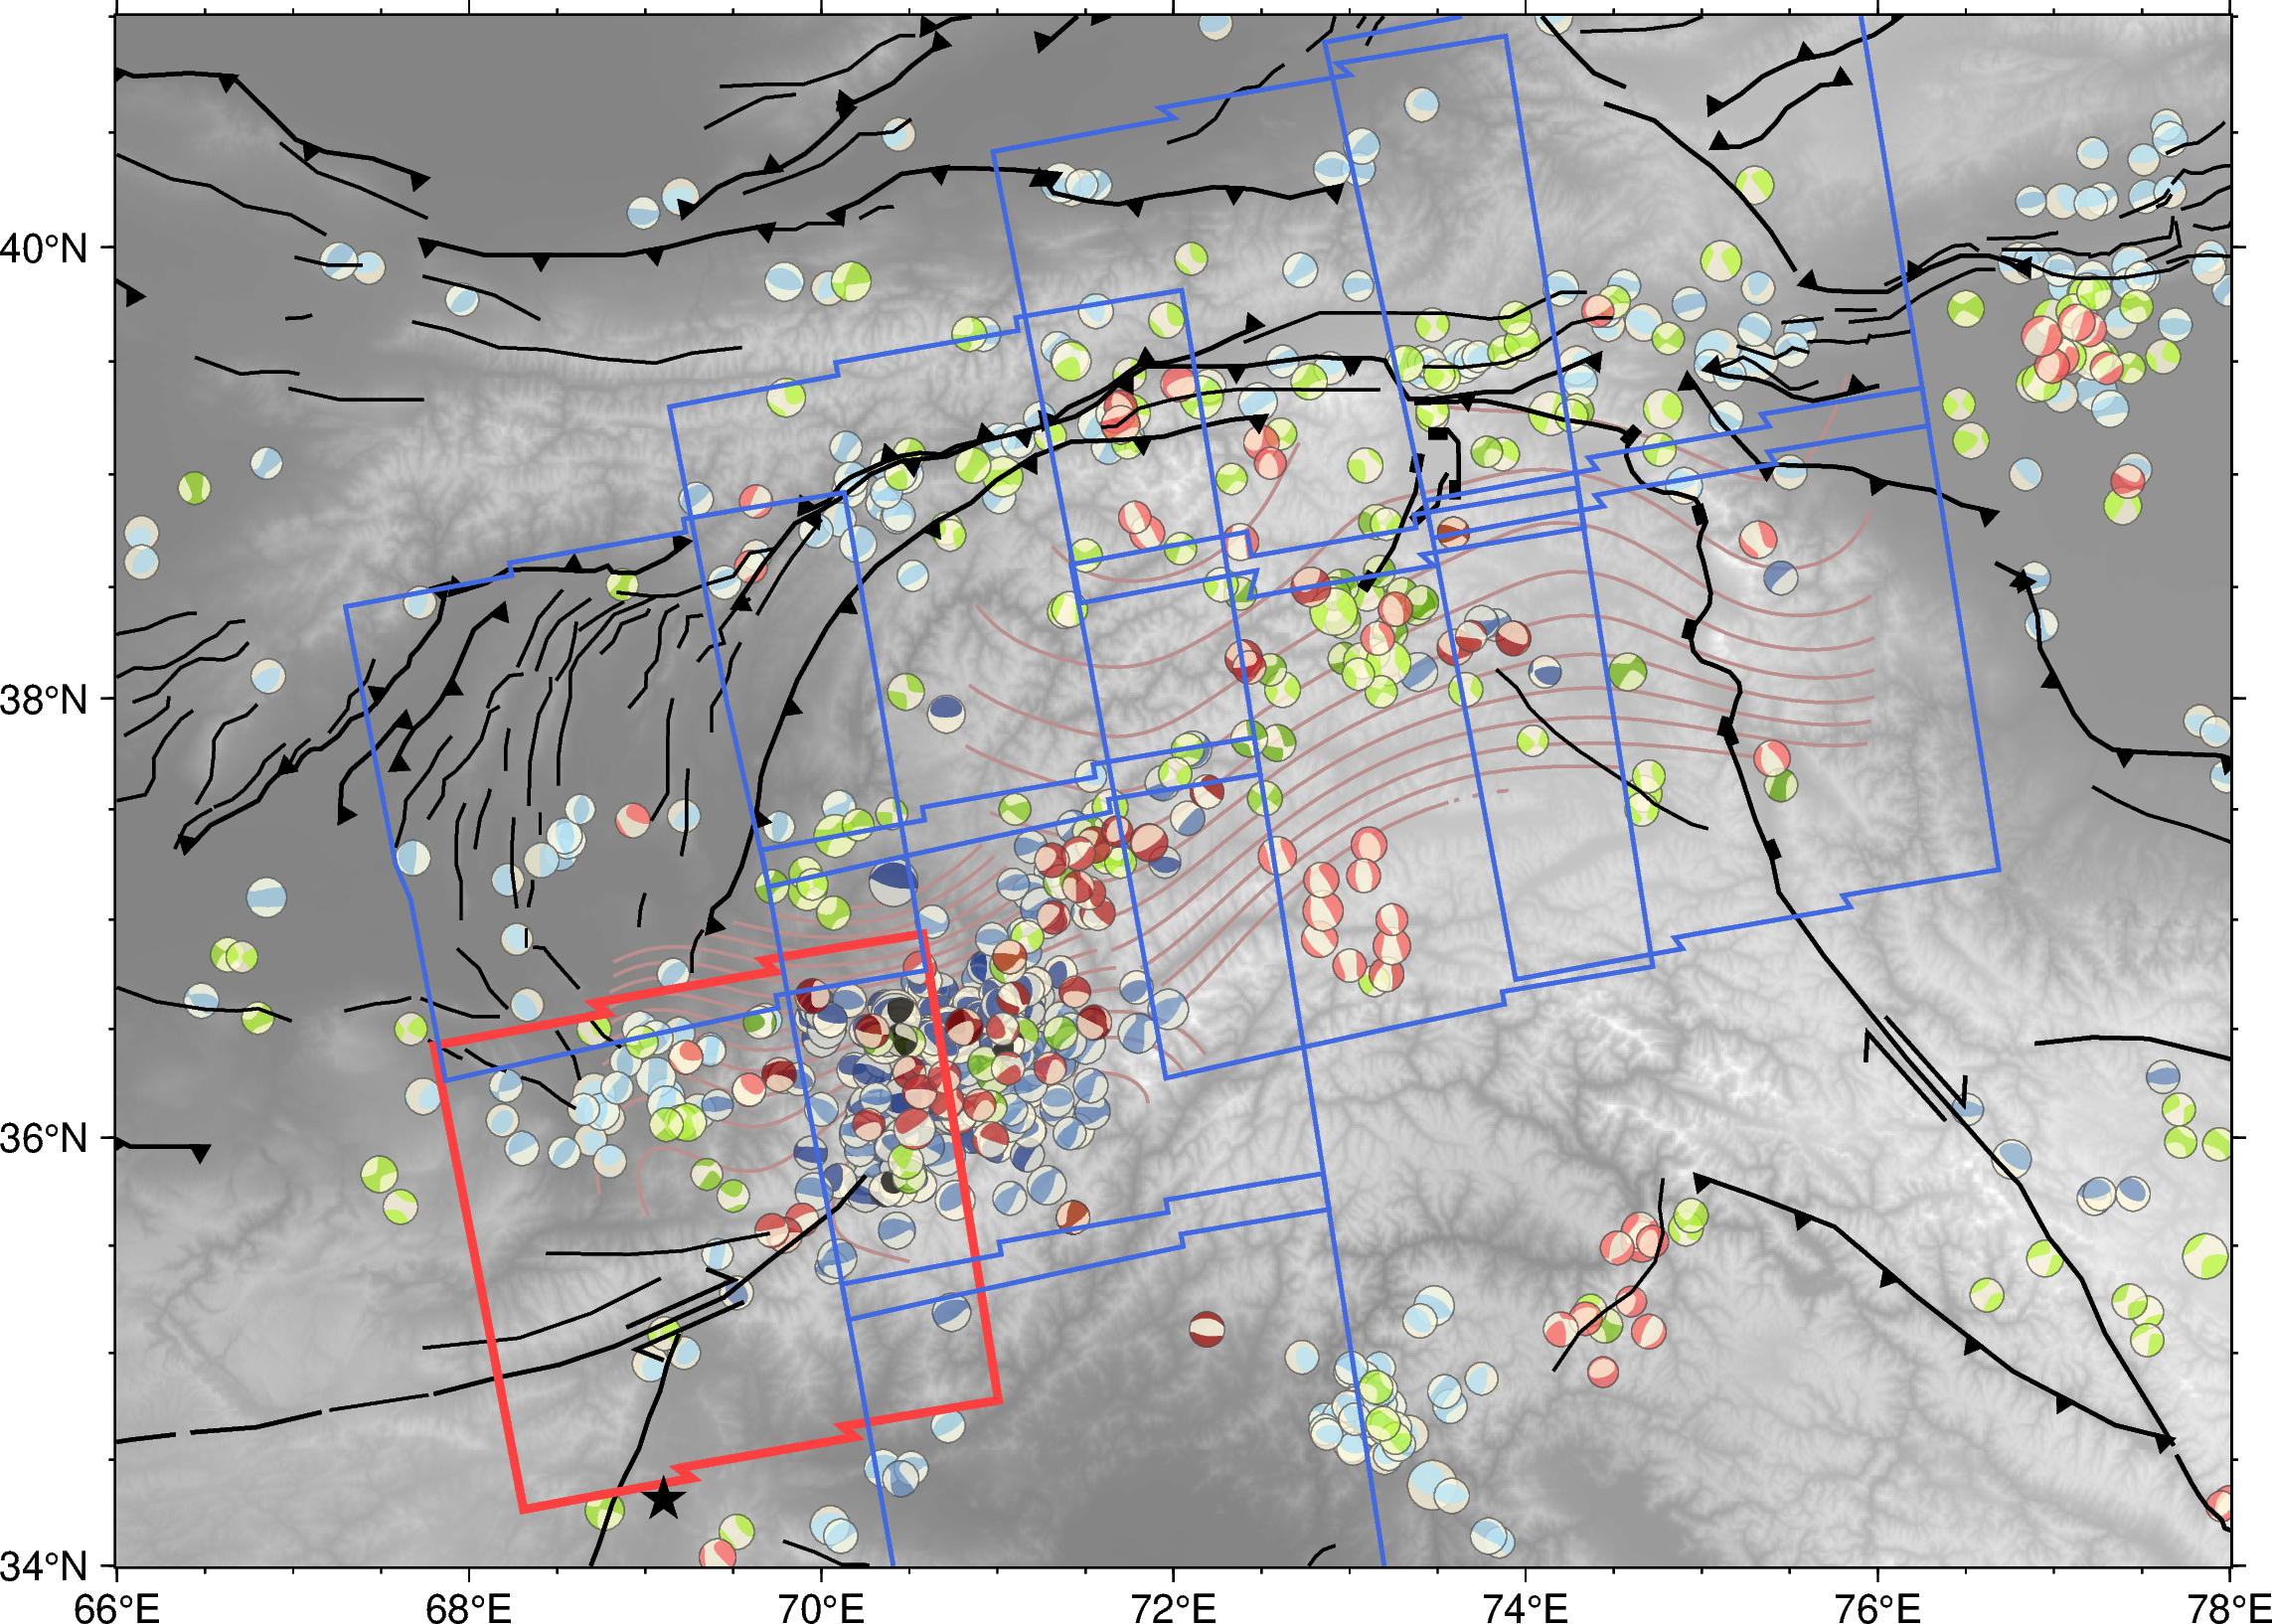

In [37]:
### GMT basemap ###
import os
dir = "/Users/rochelle/Documents/GitHub/Leeds-Research-Internship/"
os.chdir(dir)

###########################################
## Specify coords
# llcrnrlat,llcrnrlon, urcrnrlat, urcrnrlon
# are the lat/lon values of the lower left and upper right corners of the map

llcrnrlon=66 # lower left corner longitude 
llcrnrlat=34 # lower left corner latitude
urcrnrlon=78 # upper right corner longitude
urcrnrlat=41 # upper right corner latitude


proj_scale_w = 18 # specify projection scale (width)
proj_scale_unit = "c" # choose between c (cm) and i (inches)
# 17.78c = 7i

trans = 26 # meca transparency
###########################################

centerlon = (urcrnrlon - llcrnrlon)/2 + llcrnrlon # midpoints
centerlat = (urcrnrlat - llcrnrlat)/2 + llcrnrlat
region=[llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat]



fig = pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE="plain") # figure config (borders)
fig.coast(region=region,\
          projection="M%s/%s/%s%s" % (centerlon, urcrnrlat, proj_scale_w, proj_scale_unit),\
          water="white", land="grey", shorelines="1/0.5p",\
          frame=["WSne", "a2f0.5"])

          # Mercator
          # a2f0.5 --> major ticks every 2 and minor ticks every 0.5

grid = pygmt.datasets.load_earth_relief("30s", registration="gridline", region=region)

fig.grdimage(grid=grid, cmap="bin/cpt/seabluelandgrey.cpt")
# fig.grdimage(grid=grid, cmap="geo")

## plot slab2.0 here
fig.plot(data="bin/hin_slab2_dep_02.24.18_contours.in", pen=f"0.7p,rosybrown") # Hindu Kush, bounding coords 66 74 40 34
fig.plot(data="bin/pam_slab2_dep_02.26.18_contours.in", pen=f"0.7p,rosybrown") # Pamir, bounding coords 68 78 41 35


## plotting HarvardCMT earthquakes by fault style 20160309 20240710
fig.meca(
    spec="bin/Harvard_CMT_full/HarvardCMT_thrust_dropname.xy",
    convention="mt", scale="0.28c",
    cmap="bin/cpt/blue.cpt",
    extensionfill="cornsilk",
    # Draw a 0.5 points thick dark gray ("gray30") solid outline via
    # the pen parameter [Default is "0.25p,black,solid"]
    pen="thinnest,gray30,solid", transparency=trans,
)

fig.meca(
    spec="bin/Harvard_CMT_full/HarvardCMT_ss_dropname.xy",
    convention="mt", scale="0.28c",
    cmap="bin/cpt/green.cpt",
    extensionfill="cornsilk",
    pen="thinnest,gray30,solid", transparency=trans,
)

fig.meca(
    spec="bin/Harvard_CMT_full/HarvardCMT_normal_dropname.xy",
    convention="mt", scale="0.28c",
    cmap="bin/cpt/red.cpt",
    extensionfill="cornsilk",
    pen="thinnest,gray30,solid", transparency=trans,
)



## plotting faults
# https://www.pygmt.org/dev/gallery/lines/linefronts.html
fig.plot(data="bin/faults/HimaTibetMap.gmt", pen=f"0.7p,black") # all faults
fig.plot(data="bin/faults/normal.gmt", style="f1c/0.13c+l+b", pen=f"0.95p,black", fill="black") # normal
fig.plot(data="bin/faults/thrust.gmt", style="f1c/0.13c+l+t", pen=f"0.95p,black", fill="black") # thrust
fig.plot(data="bin/faults/dextral.gmt", style="f5c/1c+r+s45+o2.25c", pen=f"0.95p,black", fill="black") # dextral (right)
fig.plot(data="bin/faults/sinistral.gmt", style="f5c/1c+l+s45+o2.25c", pen=f"0.95p,black", fill="black") # sinistral (left)


## plotting poly.txt
fig.plot(data="bin/metadata/071A_05440_131313-poly.txt", pen=f"2p,brown1") # 071A_05440_131313
fig.plot(data="bin/metadata/173A_05350_131313-poly.txt", pen=f"1p,royalblue") # 173A_05350_131313
fig.plot(data="bin/metadata/100A_05236_141313-poly.txt", pen=f"1p,royalblue") # 100A_05236_141313
fig.plot(data="bin/metadata/027A_05194_131313-poly.txt", pen=f"1p,royalblue") # 027A_05194_131313
fig.plot(data="bin/metadata/071A_05240_131313-poly.txt", pen=f"1p,royalblue") # 071A_05240_131313
fig.plot(data="bin/metadata/173A_05151_131313-poly.txt", pen=f"1p,royalblue") # 173A_05151_131313
fig.plot(data="bin/metadata/100A_05036_121313-poly.txt", pen=f"1p,royalblue") # 100A_05036_121313
fig.plot(data="bin/metadata/027A_04994_131313-poly.txt", pen=f"1p,royalblue") # 027A_04994_131313
fig.plot(data="bin/metadata/173A_05550_131313-poly.txt", pen=f"1p,royalblue") # 173A_05550_131313


## plotting cities and stuff
fig.plot(x=69.1042, y=34.3131, style="a0.38c", pen="black", fill="black")  # Kabul

fig.show()
fig.savefig("figures/Hindu_Kush_study_area_InSAR.png")